In [1]:
import numpy as np 
import scipy as sp
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from numpy.linalg import eig

# Maier Saupe Model 

The free energy is given by: 
$$f(t,Q_{\mu\mu})=\frac{1}{2}\sum_{\mu}Q_{\mu\mu}^2 -t\ln2 + \frac{1}{2}\sum_\mu Q_{\mu\mu} -t\ln\sum_{\mu}e^{\frac{3Q_{\mu\mu}}{2t}}$$
where $\mu=x,y,z$. Here we perform the chenge of variables $S \equiv Q_{zz}$ and $\eta \equiv Q_{yy} - Q_{xx}$

#### If $S\neq 0$ and $\eta = 0$

/var/folders/1q/ck574qds4v36l1t2j4jftvq80000gn/T/ipykernel_96043/3590956849.py:29: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  sol = fsolve(lambda x : [f_S(t,x[0],n=0)], [S_vals[-1]] if S_vals else [1.0], xtol=1e-12)


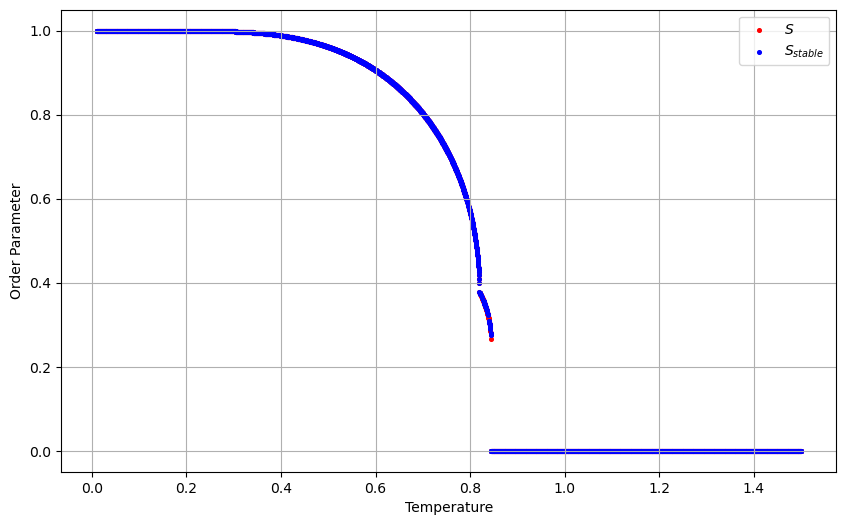

In [9]:
def f_S(t,S,n): 
    exp_1=np.exp((3/2)*S/t)
    exp_2=np.exp((-3/4)*(S+n)/t)
    exp_3=np.exp((3/4)*(-S+n)/t)
    
    num= exp_1
    denom= exp_1+exp_2+exp_3 
    
    return S+(1/2)-(3/2)*num/denom

def f_SS(t,S):

    exp_1=np.exp((9/4)*S/t)
     
    denom1 = 2*t*(2+exp_1)**2
    denom2 = 8*t +4*exp_1*t 

    return 1 + 27/denom1 - 27/denom2

def stability_check(t, S): 
    return True if f_SS(t, S) > 0 else False
   

# Solve for a range of temperatures
T_vals = np.linspace(0.01, 1.5, 5000)
S_vals = []

for t in T_vals:
    sol = fsolve(lambda x : [f_S(t,x[0],n=0)], [S_vals[-1]] if S_vals else [1.0], xtol=1e-12) 
    S_vals.append(sol[0])

S_stable=[]
T_stable=[]

for i in range(len(T_vals)): 
    if stability_check(T_vals[i],S_vals[i]):
        S_stable.append(S_vals[i]) 
        T_stable.append(T_vals[i]) 

# Plot
fig4=plt.figure(figsize=(10, 6))

plt.scatter(T_vals, S_vals, label=r'$S$', color='red',s=7)
plt.scatter(T_stable, S_stable, label=r'$S_{stable}$', color='blue',s=7)

plt.xlabel('Temperature')
plt.ylabel('Order Parameter')
plt.legend()
plt.grid(True) 
plt.show()
fig4.savefig(fname='Stable_Result')


#### If $S\neq 0$ and $\eta \neq 0$

/var/folders/1q/ck574qds4v36l1t2j4jftvq80000gn/T/ipykernel_96043/1399053525.py:59: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  sol = fsolve(lambda x : [first_eqs(t,x[0],x[1]), seccond_eqs(t,x[0],x[1])], [S_vals[-1], n_vals[-1]] if S_vals else [0.6, 0.6], xtol=1e-12)


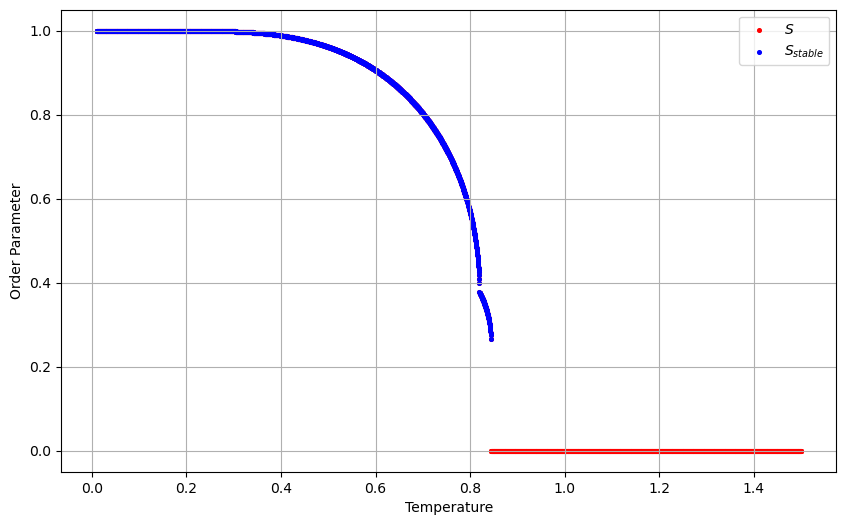

In [13]:
def first_eqs(t,S,n):
    exp_1=np.exp((3/2)*S/t)
    exp_2=np.exp((-3/4)*(S+n)/t)
    exp_3=np.exp((3/4)*(-S+n)/t)
    
    num= exp_1
    denom= exp_1+exp_2+exp_3 
    
    return S + (1/2) - (3/2)*num/denom

def seccond_eqs(t,S,n): 
    exp_1=np.exp((3/2)*S/t)
    exp_2=np.exp((-3/4)*(S+n)/t)
    exp_3=np.exp((3/4)*(-S+n)/t) 

    num= exp_2 - exp_3
    denom= exp_1 + exp_2 + exp_3 

    return n + (3/2)*num/denom 

def hessian(t,S,n): 
    exp_1= np.exp(3*n/(4*t))
    exp_2= np.exp(9*n/(4*t))
    exp_3= np.exp(3*n/(2*t))
    exp_4= np.exp(3*(3*S+n)/(4*t))
    exp_5= np.exp(9*(S+n)/(4*t))

    # Define the denominator
    denominator = 4 * t * (1 + exp_3 + exp_4)**2 

    # Define the elements of the Hessian matrix 
    H11 = 1 - (9 * exp_1 * (exp_2 + exp_1) )/denominator
    H12 = 9 * exp_3/ denominator
    H13 = 9 * exp_4 / denominator
    H22 = 1 - (9 * exp_3 * (1 + exp_4) )/ denominator
    H23 = 9 * exp_5  / denominator
    H33 = (4*t*exp_4 + 4*t*(1+exp_3)**2 + exp_4*(1+exp_3)*(-9+8*t)) / denominator

    # Construct the Hessian matrix using numpy
    hessian_matrix = np.array([[H11, H12, H13],
                                [H12, H22, H23],
                                [H13, H23, H33]])
    
    return hessian_matrix

def stability_check(t,S,n): 

    eigen_values, eigen_vectors = eig(hessian(t,S,n))

    return True if any(i < 0 for i in eigen_values) else False


# Solve for a range of temperatures
T_vals = np.linspace(0.01, 1.5, 5000)
S_vals = []
n_vals = []

for t in T_vals:
    sol = fsolve(lambda x : [first_eqs(t,x[0],x[1]), seccond_eqs(t,x[0],x[1])], [S_vals[-1], n_vals[-1]] if S_vals else [0.6, 0.6], xtol=1e-12)
    
    S_vals.append(sol[0])
    n_vals.append(sol[1]) 

S_stable=[]
n_stable=[] 
T_stable=[]

for i in range(len(T_vals)): 
    if stability_check(T_vals[i], S_vals[i], n_vals[i]):
        S_stable.append(S_vals[i]) 
        n_stable.append(n_vals[i]) 
        T_stable.append(T_vals[i]) 

# Plot
fig4=plt.figure(figsize=(10, 6))

plt.scatter(T_vals, S_vals, label=r'$S$', color='red',s=7)
plt.scatter(T_stable, S_stable, label=r'$S_{stable}$', color='blue',s=7)

#plt.scatter(T_vals, n_vals, label=r'$\eta$', color='red',s=7)
#plt.scatter(T_stable, n_stable, label=r'$\eta-stable$', color='blue',s=7)


plt.xlabel('Temperature')
plt.ylabel('Order Parameter')
plt.legend()
plt.grid(True) 
plt.show()
fig4.savefig(fname='Stable_Result_2')